# Pytorch - Getting started

More info at https://pytorch.org/tutorials/

In [31]:
import torch
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# init tensor with random value
x = torch.rand(5, 3)
print(x)

tensor([[0.6029, 0.4131, 0.6428],
        [0.2410, 0.3624, 0.4268],
        [0.5209, 0.1688, 0.5615],
        [0.0075, 0.4773, 0.4941],
        [0.1515, 0.2772, 0.1006]])


In [18]:
print(x.type()) # <class 'torch.FloatTensor'>
print(x.dtype) # float32

y = np.zeros((4, 4))
print(y.dtype) # float64

torch.FloatTensor
torch.float32
float64


In [5]:
# tensor of 0s, the ones() method init with value of 1
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [6]:
# build tensor from multi-dimensional list
x = torch.tensor([[5, 3, 1],[3,5,2], [4,4,4],[1,2,3],[0,0,1]])
print(x)

tensor([[5, 3, 1],
        [3, 5, 2],
        [4, 4, 4],
        [1, 2, 3],
        [0, 0, 1]])


In [7]:
# shape of the tensor
print(x.size())
print(x.shape)

torch.Size([5, 3])
torch.Size([5, 3])


#### From numpy

In [10]:
import numpy as np

# Create a numpy array.
x = np.array([[1, 2], [3, 4]])


# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

print(type(z))

<class 'numpy.ndarray'>


## Basic operations 

In [11]:
x = torch.rand([5,3])

y = torch.rand([5,3])

z = x + y

print(z)

tensor([[1.0256, 1.4811, 0.6062],
        [0.5074, 1.4098, 0.6208],
        [0.6007, 1.7684, 1.5416],
        [1.1032, 0.7785, 1.1547],
        [0.2413, 1.0324, 1.2695]])


**Reshape**

In pytorch il metodo *view* permette di cambiare le dimensioni di un tensore. Un tensore contiene una sequenza di valori e le dimensioni sono solo una loro organizzazione logica. Cambiare dimensioni non determina un cambiamento della struttura dati, quindi... per tensori di "grandi" dimensioni cambiare la shape del tensore non ha un impatto sulle prestazioni, a differenza della copia.

In [19]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.shape, y.shape, z.shape)


torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## Exploiting GPUs

In [15]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
else:
    device = torch.device("cpu")          # a cpu device 

x = torch.randn(5, 3)
y = torch.ones([5,3], device=device)  # directly create a tensor on device
x = x.to(device)                       # or just use strings ``.to("cuda")``
z = x + y

print(z)
print(z.to("cpu"))    
    
if torch.cuda.is_available():
    print('move y from cpu to cuda')
    y = torch.ones([5,3])
    y = y.cuda()

tensor([[ 0.1828,  1.8583,  1.8881],
        [ 1.0323,  1.4841,  1.4918],
        [-0.7060,  1.0899,  0.0423],
        [ 0.8796,  2.3057,  0.6185],
        [ 0.6974,  0.8659,  0.5712]])
tensor([[ 0.1828,  1.8583,  1.8881],
        [ 1.0323,  1.4841,  1.4918],
        [-0.7060,  1.0899,  0.0423],
        [ 0.8796,  2.3057,  0.6185],
        [ 0.6974,  0.8659,  0.5712]])


## Automatic differentiation

In [92]:
x = torch.ones(2, 2, requires_grad=True)

print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [93]:
# tensors derived from other tensors track functions. These functions are the basis for computing the gradient
y = x + 2

print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [94]:
z = torch.pow(y,2)

t = 3 * z

out = z.mean()

print(f'z = {z}')
print(f't = {t}')
print(f'out = {out}')

print(f'\n\ngrad z = {z.grad_fn}')
print(f'grad t = {t.grad_fn}')
print(f'grad out = {out.grad_fn}')


z = tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
t = tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
out = 9.0


grad z = <PowBackward0 object at 0x12a7baf28>
grad t = <MulBackward0 object at 0x12a7baeb8>
grad out = <MeanBackward0 object at 0x12a7baf28>


## Gradients

In [95]:
print(f'OLD grad value is {x.grad}')
out.backward()

OLD grad value is None


print gradients $d(out)/dx$

In [96]:
print(x.grad)

tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])


Il calcolo del gradiente tramite il metodo *backward* funziona grazie al concetto di computation graph. Pytorch crea un grafo delle operazioni e naviga a ritroso su questo grafo per effettuare il calcolo.

Ad esempio, la variabile out definita in precedenza costruisce il seguente grafo.

    x = zeros(2, 2)
    y = x + 2
    z = y ^ 2
    out = mean(z)

Si utilizza il package torchviz per creare il Computational Graph a partire dal tensore

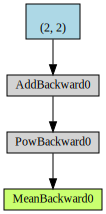

In [97]:
import torchviz

torchviz.make_dot(out)

# Neural networks in pytorch

## Basic Networks

Esempio di un semplice task di regressione lineare

In [37]:
import torch
import torch.nn as nn


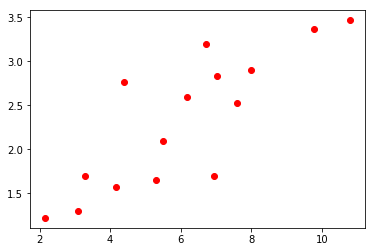

In [38]:
# Build DATASET

input_size = 1
output_size = 1

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

plt.plot(x_train, y_train, 'ro')
plt.show()

Costruzione della rete

In [39]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


Nel modulo **nn** sono presenti le implementazioni dei principali layer.

Il layer *Linear* è implementa la funzione

$$ 
y = A^T x + b
$$


In [47]:
num_epochs = 60

# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        

Epoch [5/60], Loss: 0.1805
Epoch [10/60], Loss: 0.1804
Epoch [15/60], Loss: 0.1804
Epoch [20/60], Loss: 0.1804
Epoch [25/60], Loss: 0.1804
Epoch [30/60], Loss: 0.1803
Epoch [35/60], Loss: 0.1803
Epoch [40/60], Loss: 0.1803
Epoch [45/60], Loss: 0.1802
Epoch [50/60], Loss: 0.1802
Epoch [55/60], Loss: 0.1802
Epoch [60/60], Loss: 0.1801


Per addestrare il modello, si effettuano due operazioni principali: forward pass e backward pass. Con il primo si calcolano le performance del modello sul training set, con il secondo si aggiornano i pesi. Lo schema di ogni epoca è riassumibile in:

1. si applica il modello al training set (forward)
2. si calcola la funzione di loss
3. si aggiornano i pesi del modello tramite l'optimizer (backward)

N.B. Ad ogni iterazione, prima di aggiornare i pesi dei layer, il valore del gradiente deve essere azzerato. Il metodo *zero_grad* dell'optimizer effettua l'operazione per tutti i tensori presenti nel computation graph

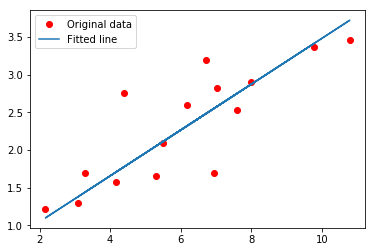

In [42]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [44]:
# compare predictions
for x,y,hat_y in zip(x_train,y_train,predicted):
    print(f'input = {x[0]:.3f} \t->\t output = {hat_y[0]:.3f} \t (y = {y[0]:.3f})')

input = 3.300 	->	 output = 1.444 	 (y = 1.700)
input = 4.400 	->	 output = 1.779 	 (y = 2.760)
input = 5.500 	->	 output = 2.113 	 (y = 2.090)
input = 6.710 	->	 output = 2.481 	 (y = 3.190)
input = 6.930 	->	 output = 2.548 	 (y = 1.694)
input = 4.168 	->	 output = 1.708 	 (y = 1.573)
input = 9.779 	->	 output = 3.414 	 (y = 3.366)
input = 6.182 	->	 output = 2.321 	 (y = 2.596)
input = 7.590 	->	 output = 2.749 	 (y = 2.530)
input = 2.167 	->	 output = 1.100 	 (y = 1.221)
input = 7.042 	->	 output = 2.582 	 (y = 2.827)
input = 10.791 	->	 output = 3.722 	 (y = 3.465)
input = 5.313 	->	 output = 2.057 	 (y = 1.650)
input = 7.997 	->	 output = 2.873 	 (y = 2.904)
input = 3.100 	->	 output = 1.384 	 (y = 1.300)


## Logistic regression 

L'esempio seguente utilizza i dati visti in precedenza per costruire un modello di classificazione.

L'idea è addestrare un modello che approssimi questa regola di classificazione:

if $x \geq 6$ 
then class = 1
else class = 0

L'iperpiano $x - 6 = 0$ definisce suddivide il dominio in classe 0 e classe 1.

In [48]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([
    [0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0]
],dtype=np.int)

In [51]:
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.BCELoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

num_epochs = 20000
log_freq = num_epochs / 10

# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x_train).float()
targets = torch.from_numpy(y_train).float()

for epoch in range(num_epochs):
    # Forward pass
    outputs = torch.sigmoid(model(inputs))
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % log_freq == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        

Epoch [2000/20000], Loss: 0.4059
Epoch [4000/20000], Loss: 0.2964
Epoch [6000/20000], Loss: 0.2289
Epoch [8000/20000], Loss: 0.1827
Epoch [10000/20000], Loss: 0.1493
Epoch [12000/20000], Loss: 0.1241
Epoch [14000/20000], Loss: 0.1045
Epoch [16000/20000], Loss: 0.0889
Epoch [18000/20000], Loss: 0.0764
Epoch [20000/20000], Loss: 0.0660


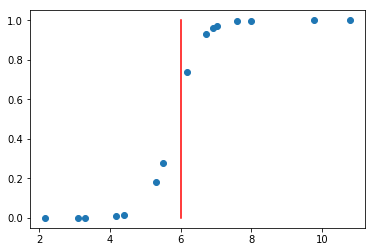

In [55]:
# boundary line x >= 6
line_y = np.linspace(0, 1., 1000)
line_x = [6] * len(line_y)

predicted = torch.sigmoid(model(torch.from_numpy(x_train))).detach().numpy()

plt.plot(x_train, predicted,'o',label='probabilities')
plt.plot(line_x, line_y, 'r')
plt.show()

In [56]:
# Predictions
for x,y,hat_y in zip(x_train,y_train,predicted):
    print(f'input = {x[0]:.3f} \t->\t Probability of 1 = {hat_y[0]:.3f} \t (y = {y[0]:.3f})')    

input = 3.300 	->	 Probability of 1 = 0.001 	 (y = 0.000)
input = 4.400 	->	 Probability of 1 = 0.015 	 (y = 0.000)
input = 5.500 	->	 Probability of 1 = 0.276 	 (y = 0.000)
input = 6.710 	->	 Probability of 1 = 0.931 	 (y = 1.000)
input = 6.930 	->	 Probability of 1 = 0.963 	 (y = 1.000)
input = 4.168 	->	 Probability of 1 = 0.007 	 (y = 0.000)
input = 9.779 	->	 Probability of 1 = 1.000 	 (y = 1.000)
input = 6.182 	->	 Probability of 1 = 0.740 	 (y = 1.000)
input = 7.590 	->	 Probability of 1 = 0.994 	 (y = 1.000)
input = 2.167 	->	 Probability of 1 = 0.000 	 (y = 0.000)
input = 7.042 	->	 Probability of 1 = 0.973 	 (y = 1.000)
input = 10.791 	->	 Probability of 1 = 1.000 	 (y = 1.000)
input = 5.313 	->	 Probability of 1 = 0.180 	 (y = 0.000)
input = 7.997 	->	 Probability of 1 = 0.998 	 (y = 1.000)
input = 3.100 	->	 Probability of 1 = 0.000 	 (y = 0.000)


# Classificazione di MNIST

In [57]:
import torchvision
import torchvision.transforms as transforms


batch_size = 64

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)



Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


In [58]:
image, label = train_dataset[0]

print(image.shape)

torch.Size([1, 28, 28])


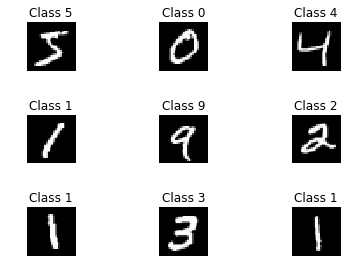

In [60]:

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    image, label = train_dataset[i]
    plt.imshow(image[0],cmap='gray', interpolation='none')
    plt.title("Class {}".format(label))
    plt.axis('off')

## Costruzione di una NN custom

L'obiettivo è costruire un modello composto da 2 livelli Linear

Si cotrisce un oggetto che estende la classe nn.Module, si implementa il metodo *\_\_init__* con l'inizializzazione della rete e si re-implemeta il metodo *forward* per effettuare l'operazione implementata dalla rete

In [81]:
class SimpleFullyConnectedNet(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(SimpleFullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)          
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [82]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 28*28
hidden_size = 300
num_classes = 10
batch_size = 100

full_model = SimpleFullyConnectedNet(input_size, hidden_size, num_classes).to(device)

#### TRAIN

In [83]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(full_model.parameters(), lr=learning_rate)  


num_epochs = 3

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(num_epochs + 1)]

In [84]:
# The number of steps for each epoch, defined by the number of instances divided by the batch size. 
total_step = len(train_loader)

def train(epoch,model,criterion,optimizer,reshape=True):
    for batch_idx, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        if reshape:
            images = images.reshape(-1, 28*28)
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (batch_idx+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, num_epochs, batch_idx+1, total_step, loss.item()))
        
        train_losses.append(loss.item())
        train_counter.append(
        (batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        
def test(model,criterion,reshape=True):
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            if reshape:
                images = images.reshape(-1, 28*28)
                
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs,labels,)
            
            test_loss += loss.item()
            
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [85]:
test(full_model,criterion)
for epoch in range(1,num_epochs+1):
    train(epoch,full_model,criterion,optimizer)
    test(full_model,criterion)


Test set: Avg. loss: 0.0365, Accuracy: 830/10000 (8%)

Epoch [1/3], Step [100/938], Loss: 0.6552
Epoch [1/3], Step [200/938], Loss: 0.3209
Epoch [1/3], Step [300/938], Loss: 0.3754
Epoch [1/3], Step [400/938], Loss: 0.3850
Epoch [1/3], Step [500/938], Loss: 0.1857
Epoch [1/3], Step [600/938], Loss: 0.1851
Epoch [1/3], Step [700/938], Loss: 0.1889
Epoch [1/3], Step [800/938], Loss: 0.2391
Epoch [1/3], Step [900/938], Loss: 0.1428

Test set: Avg. loss: 0.0030, Accuracy: 9443/10000 (94%)

Epoch [2/3], Step [100/938], Loss: 0.1472
Epoch [2/3], Step [200/938], Loss: 0.1146
Epoch [2/3], Step [300/938], Loss: 0.1145
Epoch [2/3], Step [400/938], Loss: 0.3201
Epoch [2/3], Step [500/938], Loss: 0.0903
Epoch [2/3], Step [600/938], Loss: 0.2025
Epoch [2/3], Step [700/938], Loss: 0.1085
Epoch [2/3], Step [800/938], Loss: 0.1930
Epoch [2/3], Step [900/938], Loss: 0.1691

Test set: Avg. loss: 0.0022, Accuracy: 9596/10000 (96%)

Epoch [3/3], Step [100/938], Loss: 0.1856
Epoch [3/3], Step [200/938], L

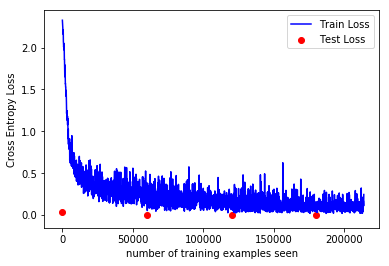

In [86]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('Cross Entropy Loss')
plt.show()


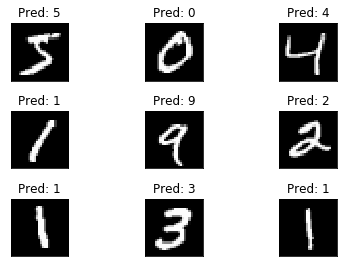

In [87]:
# Predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)


for i in range(9):
  plt.subplot(3,3,i+1)
  
  image, label = train_dataset[i]
  with torch.no_grad():
    output = full_model(image.reshape(-1, 28*28).to(device))
    _, predicted = torch.max(output.data, 1)
    
    
  
  plt.tight_layout()
  plt.imshow(image[0], cmap='gray', interpolation='none')
  plt.title("Pred: {}".format(predicted.item()))
  plt.xticks([])
  plt.yticks([])
